In [2]:
def prediction(img_path, model):
    
    from tensorflow.keras.preprocessing import image
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    # Setting Training Hyperparameters
    img_width=img_height=224
       
    # create a sharpening kernel
    sharpen_filter=np.array([[0,-4,0],
                 [-4,17,-4],
                [0,-4,0]])
    
    org_img = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    
    # applying kernels to the BGR image to get the sharpened image
    sharp_image=cv2.filter2D(img_tensor,-1,sharpen_filter)

    sharp_image=sharp_image.reshape(1,img_width,img_height,3)
    sharp_image /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()

    # Make prediction
    try:
        prediction = model.predict(sharp_image)
    except:
        prediction = model.predict(sharp_image.reshape(1,7*7*512*6))
        
 
    
    return prediction

In [3]:
from keras.models import load_model

In [6]:
# load model
model = load_model('./mobileNet_classes99.20(5)/mobileNet_classes99.20(5)')

In [7]:
classes = ['Candida.albicans',
 'Escherichia.coli',
 'Lactobacillus.casei',
 'Lactobacillus.jehnsenii',
 'Staphylococcus.aureus']

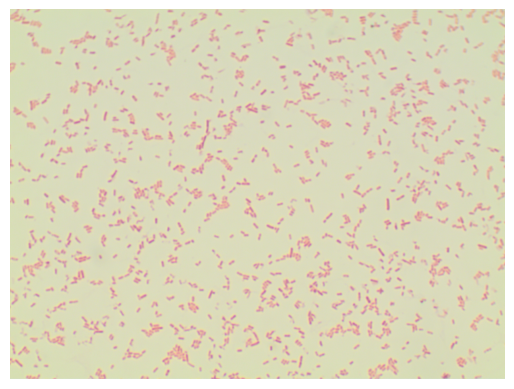

1/1 [==============================] - 0s 149ms/step
I see...Lactobacillus.jehnsenii


In [12]:
import numpy as np
result=prediction("F:/desk/down/Escherichia.coli/Escherichia.coli_0010.tif",model)

print("I see..."+str(classes[np.argmax(np.array(result[0]))]))

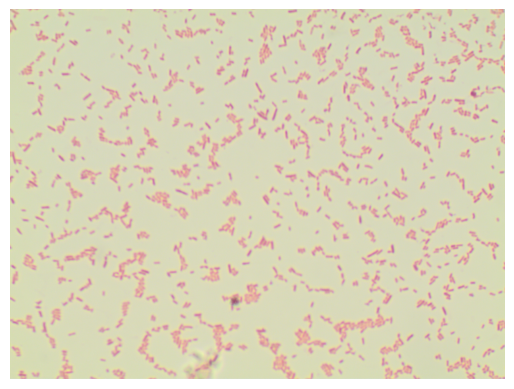

1/1 [==============================] - 0s 111ms/step
I see...Lactobacillus.jehnsenii


In [17]:
result=prediction("F:/desk/down/Escherichia.coli/Escherichia.coli_0004.tif",model)

print("I see..."+str(classes[np.argmax(np.array(result[0]))]))